<a href="https://colab.research.google.com/github/flake313/Malashin/blob/main/7%268.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Корень методом бисекции: 1.5213804244995117
Корень методом Ньютона: 1.5213798059647863
Корень методом секущих: 1.5213797068045645


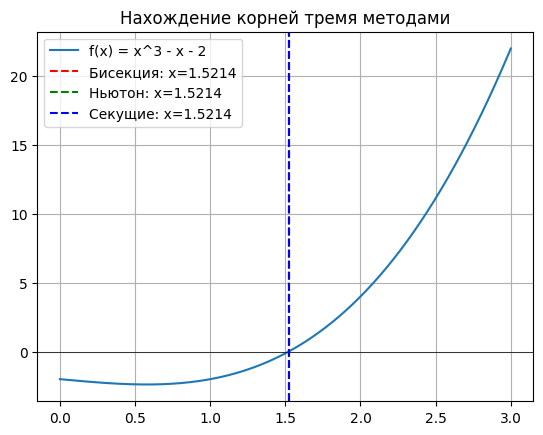

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#TZ : Нахождение 1 корня уравнений 3 способами
# Функция для которой ищем корень
def func(x):
    return x**3 - x - 2

# Производная функции (для метода Ньютона)
def dfunc(x):
    return 3 * x**2 - 1

# Метод половинного деления (бисекции)
def bisection_method(f, a, b, tol):
    if f(a) * f(b) >= 0:
        print("Неправильный интервал: функция должна менять знак на концах интервала.")
        return None
    while (b - a) / 2 > tol:
        c = (a + b) / 2
        if f(c) == 0:
            return c  # Точное решение
        elif f(a) * f(c) < 0:
            b = c
        else:
            a = c
    return (a + b) / 2

# Метод Ньютона (касательных)
def newton_method(f, df, x0, tol):
    xn = x0
    while abs(f(xn)) > tol:
        xn = xn - f(xn) / df(xn)
    return xn

# Метод секущих
def secant_method(f, x0, x1, tol):
    while abs(x1 - x0) > tol:
        x_temp = x1 - f(x1) * (x1 - x0) / (f(x1) - f(x0))
        x0, x1 = x1, x_temp
    return x1

# Параметры для нахождения корней
a = 1  # Левая граница для метода бисекции
b = 2  # Правая граница для метода бисекции
x0 = 1.5  # Начальное приближение для метода Ньютона и секущих
tol = 1e-6  # Точность

# Нахождение корней тремя методами
root_bisection = bisection_method(func, a, b, tol)
root_newton = newton_method(func, dfunc, x0, tol)
root_secant = secant_method(func, a, b, tol)

# Вывод результатов
print(f"Корень методом бисекции: {root_bisection}")
print(f"Корень методом Ньютона: {root_newton}")
print(f"Корень методом секущих: {root_secant}")

# График функции
x = np.linspace(0, 3, 400)
y = func(x)

plt.plot(x, y, label="f(x) = x^3 - x - 2")
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(root_bisection, color='r', linestyle='--', label=f"Бисекция: x={root_bisection:.4f}")
plt.axvline(root_newton, color='g', linestyle='--', label=f"Ньютон: x={root_newton:.4f}")
plt.axvline(root_secant, color='b', linestyle='--', label=f"Секущие: x={root_secant:.4f}")
plt.title('Нахождение корней тремя методами')
plt.legend()
plt.grid(True)
plt.show()

2425.01 - метод прямоугольников
2478.2100000000005 - метод трапеции
2478.0 - метод симпсона


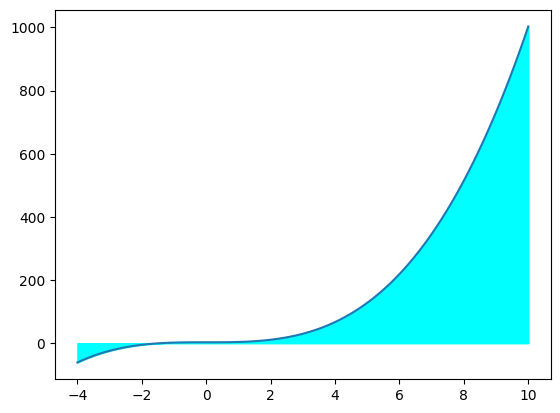

In [2]:
import numpy as np
from matplotlib import pyplot as plt

#TZ : Вычисление интеграла 3 способами
# Пределы интегрирования
a = -4
b = 10

# Количество шагов (N) для численных методов
N = (b - a) * 10  # Количество разбиений интервала

# Функция для интегрирования
def y(x):
    return x ** 3 + 3

# Создаём массив точек x для графика функции
x = np.linspace(a, b, 100)

# Вычисляем значения функции y для каждой точки x
y1 = y(x)

# Визуализация функции и области под ней
plt.plot(x, y1)  # График функции y(x)
plt.fill_between(x, y1, np.zeros_like(y1), color='cyan')  # Заливка области под кривой

# Метод прямоугольников
S = 0
for i in range(a * 10, b * 10, 1):  # Умножаем a и b на 10 для удобства вычислений
    sn = y(i / 10) * (b - a) / N  # Вычисляем площадь одного прямоугольника
    S += sn  # Суммируем площади всех прямоугольников
print(S, "- метод прямоугольников")

# Метод трапеций
S = 0
for i in range(a * 10, b * 10, 1):
    sn = (y(i / 10) * (b - a) / N + y(i / 10 + 0.1) * (b - a) / N) / 2  # Средняя высота трапеции
    S += sn  # Суммируем площади всех трапеций
print(S, "- метод трапеции")

# Метод Симпсона
width = (b - a) / N  # Шаг разбиения
r = 0
for step in range(0, N):
    x1 = a + step * width
    x2 = a + (step + 1) * width
    # Вычисляем площадь по методу Симпсона для одного подотрезка
    r += (x2 - x1) / 6.0 * (y(x1) + 4.0 * y(0.5 * (x1 + x2)) + y(x2))
print(r, "- метод симпсона")

# Показываем график функции
plt.show()